<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part4_beta_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=d307a1f02cfce14fdf5874792dd2d21ecae976202ab9ca5930ac944f0516cc0d
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma, alpha, mu):
    S, E, I, R = y
    dSdt = mu - (beta * S * I) - mu*S
    dEdt = (beta * S * I)  - (mu + alpha)*E
    dIdt = (alpha*E) - (mu + gamma)*I
    dRdt = gamma*I   -  mu*R
    return dSdt, dEdt, dIdt, dRdt

In [3]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [4]:
""" alpha is a list of 1000 random number in (0.05,1) """

import random
alpha = []
for i in range(1000):
    alpha.append(random.uniform(0, 1))
    


In [5]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))

In [6]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i])

In [7]:
mu =  0.0133

In [8]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])  
  
Beta = pd.DataFrame(beta_list)

In [9]:
gamma_list = []
for i in range(1000):
  for j in range(10):
    gamma_list.append(gamma[i])  
  
Gamma = pd.DataFrame(gamma_list)

In [10]:
alpha_list = []
for i in range(1000):
  for j in range(10):
    alpha_list.append(alpha[i])  
  
Alpha = pd.DataFrame(alpha_list)

In [12]:
""" P, Q, M, T are the list of S, E, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M = []
T = []
for i in range(1000): #Plotted for 2 sets
  N = 1
  S0, E0, I0, R0 = 0.99,0.005,0.005,0   # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, E0, I0, R0 # Initial conditions vector
  # Integrate the SEIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i], alpha[i],mu))
  S, E, I, R = ret.T
  P.append(S)
  Q.append(E)
  M.append(I)
  T.append(R)

  

In [13]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
E_value = pd.DataFrame(Q)
I_value = pd.DataFrame(M)
R_value = pd.DataFrame(T)

In [14]:
""" S_list, E_list, I_list, R_list are the list of S, E, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, E_list, I_list, R_list are  lists of 1000 itens and each item itself list of 10 values 
    and S_actual, E_actual, I_actual, R_actual are list of S, E, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """


S_list = []
S_actual = []
E_list = []
E_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  E_list.append(E_value[p].iloc[i].to_list())
  E_actual.append(E_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [20]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

exposed_list = []
for i in range(1000):
 exposed_list = exposed_list+E_list[i] 

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]

susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

exposedactual_list = []
for i in range(1000):
 exposedactual_list = exposedactual_list+E_actual[i]  

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [21]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(exposed_list)
df_3 = pd.DataFrame(infected_list)
df_4 = pd.DataFrame(recov_list)
df_5 = pd.DataFrame(susactual_list)
df_6 = pd.DataFrame(exposedactual_list)
df_7 = pd.DataFrame(infectedactual_list)
df_8 = pd.DataFrame(recovactual_list)

In [22]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,Beta,Gamma,Alpha], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.458238,0.000647,0.000791,0.540324,0.464649,0.000721,0.000875,0.533755,1.956812,0.6892,0.97833
1,0.293204,0.000390,0.000625,0.705780,0.302196,0.000365,0.000574,0.696865,1.956812,0.6892,0.97833
2,0.189753,0.001767,0.003732,0.804747,0.199202,0.001446,0.002960,0.796392,1.956812,0.6892,0.97833
3,0.482756,0.001035,0.001228,0.514981,0.488355,0.001181,0.001391,0.509073,1.956812,0.6892,0.97833
4,0.199202,0.001446,0.002960,0.796392,0.208730,0.001199,0.002382,0.787689,1.956812,0.6892,0.97833


In [23]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7,8,9,10]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [24]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.386381,0.002669,0.003151,0.636714,0.391808,0.002972,0.003456,0.626630,0.690265,0.690746,0.978460
1,0.198175,0.001608,0.002490,0.831686,0.205985,0.001501,0.002267,0.818126,0.690265,0.690746,0.978460
2,0.080199,0.007308,0.014867,0.948308,0.088176,0.005969,0.011696,0.934973,0.690265,0.690746,0.978460
3,0.414342,0.004278,0.004891,0.606850,0.418924,0.004873,0.005498,0.597652,0.690265,0.690746,0.978460
4,0.090975,0.005979,0.011790,0.938462,0.099074,0.004949,0.009412,0.924755,0.690265,0.690746,0.978460
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.795808,0.154521,0.030374,0.162381,0.792844,0.154879,0.030269,0.163902,0.251525,0.480506,0.101607
9996,0.871753,0.120578,0.023339,0.095648,0.868849,0.121795,0.023439,0.097318,0.251525,0.480506,0.101607
9997,0.851923,0.131561,0.025566,0.112354,0.848915,0.132622,0.025623,0.114053,0.251525,0.480506,0.101607
9998,0.831947,0.141242,0.027558,0.129651,0.828895,0.142093,0.027564,0.131335,0.251525,0.480506,0.101607


In [25]:
data_scaled[[0,1,2,3,4,5,6,7,8,9,10]] = data_scaled[[0,1,2,3,4,5,6,7,8,9,10]].apply(lambda x: x*100) 

In [26]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,38.638107,0.266937,0.315074,63.671404,39.180785,0.297154,0.345593,62.663001,69.026511,69.074554,97.846045
1,19.817534,0.160832,0.248987,83.168572,20.598549,0.150064,0.226657,81.812561,69.026511,69.074554,97.846045
2,8.019917,0.730839,1.486707,94.830790,8.817573,0.596870,1.169561,93.497311,69.026511,69.074554,97.846045
3,41.434155,0.427779,0.489106,60.684976,41.892389,0.487316,0.549812,59.765183,69.026511,69.074554,97.846045
4,9.097459,0.597893,1.178954,93.846228,9.907406,0.494905,0.941198,92.475529,69.026511,69.074554,97.846045
...,...,...,...,...,...,...,...,...,...,...,...
9995,79.580832,15.452089,3.037397,16.238097,79.284354,15.487905,3.026855,16.390249,25.152536,48.050649,10.160742
9996,87.175298,12.057796,2.333907,9.564785,86.884907,12.179495,2.343860,9.731788,25.152536,48.050649,10.160742
9997,85.192287,13.156101,2.556551,11.235410,84.891517,13.262241,2.562345,11.405322,25.152536,48.050649,10.160742
9998,83.194683,14.124243,2.755764,12.965089,82.889453,14.209322,2.756423,13.133543,25.152536,48.050649,10.160742


In [27]:
X = data_scaled[[0,1,2,3,4,5,6,7]]
y = data_scaled[8]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [30]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [33]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [34]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[01:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 5.7000222 for 714 rounds
CV with max_depth=9, min_child_weight=6
[01:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [35]:
params['max_depth'] = 10
params['min_child_weight'] = 7

In [36]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[01:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 5.6351130000000005 for 608 rounds
CV with subsample=1.0, colsample=0.9
[01:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror

In [37]:
params['subsample'] = 0.7
params['colsample_bytree'] = 1

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
CV with eta=0.3
[02:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 42.1 s, sys: 127 ms, total: 42.2 s
Wall time: 21.3 s
	MAE 5.537682200000001 for 336 rounds

CV with eta=0.2
[02:04:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:35] WARNING: /workspace/src

In [38]:
params['eta'] = .05

In [39]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[06:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:32.5338
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:30.9505
[2]	DEV-mae:29.44
[3]	DEV-mae:28.0054
[4]	DEV-mae:26.6517
[5]	DEV-mae:25.3932
[6]	DEV-mae:24.163
[7]	DEV-mae:23.0155
[8]	DEV-mae:21.922
[9]	DEV-mae:20.8925
[10]	DEV-mae:19.9254
[11]	DEV-mae:18.9906
[12]	DEV-mae:18.1178
[13]	DEV-mae:17.3083
[14]	DEV-mae:16.5736
[15]	DEV-mae:15.8425
[16]	DEV-mae:15.1778
[17]	DEV-mae:14.5512
[18]	DEV-mae:13.9555
[19]	DEV-mae:13.4033
[20]	DEV-mae:12.8915
[21]	DEV-mae:12.4167
[22]	DEV-mae:11.9607
[23]	DEV-mae:11.5338
[24]	DEV-mae:11.1268
[25]	DEV-mae:10.7587
[26]	DEV-mae:10.3981
[27]	DEV-mae:10.0891
[28]	DEV-mae:9.79736
[29]	DEV-mae:9.52934
[30]	DEV-mae:9.28707
[31]	DEV-mae:9.06505
[32]	DEV-mae:8.86459
[33]	DEV-mae:8.67392
[34]	DEV-mae:8.49714
[35]	DEV-mae:8.32495
[36]	DEV-mae:8.18278
[37]	DEV-mae:8.04312
[38]	DEV-mae:7.91139
[39]	DEV-mae:

In [40]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[06:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:33.3864
[1]	Test-mae:31.781
[2]	Test-mae:30.264
[3]	Test-mae:28.8187
[4]	Test-mae:27.4429
[5]	Test-mae:26.1315
[6]	Test-mae:24.9027
[7]	Test-mae:23.7441
[8]	Test-mae:22.6409
[9]	Test-mae:21.6066
[10]	Test-mae:20.6342
[11]	Test-mae:19.701
[12]	Test-mae:18.8371
[13]	Test-mae:18.0236
[14]	Test-mae:17.2616
[15]	Test-mae:16.5451
[16]	Test-mae:15.8684
[17]	Test-mae:15.2392
[18]	Test-mae:14.644
[19]	Test-mae:14.0989
[20]	Test-mae:13.5837
[21]	Test-mae:13.1022
[22]	Test-mae:12.649
[23]	Test-mae:12.222
[24]	Test-mae:11.8162
[25]	Test-mae:11.421
[26]	Test-mae:11.0575
[27]	Test-mae:10.7259
[28]	Test-mae:10.4203
[29]	Test-mae:10.1356
[30]	Test-mae:9.863
[31]	Test-mae:9.60971
[32]	Test-mae:9.37053
[33]	Test-mae:9.14615
[34]	Test-mae:8.94482
[35]	Test-mae:8.76084
[36]	Test-mae:8.58399
[37]	Test-mae:8.41213
[38]	Test-mae:8.26539
[39]	Test-mae:8.12398
[40]	Test-ma

In [41]:
mean_absolute_error(best_model.predict(dtest), y_test1)

4.827188433715053

In [42]:
best_model.save_model("my_model.model")

In [43]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[06:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


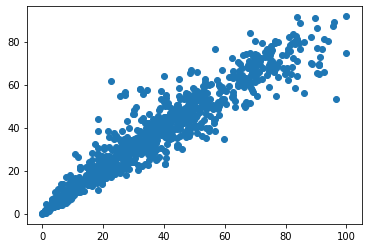

In [44]:
plt.scatter(y_test1,p)

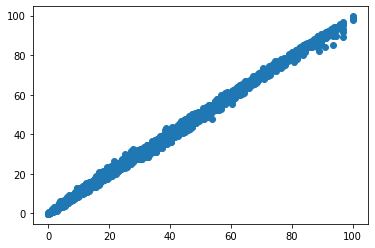

In [45]:
plt.scatter(y_train,q)

In [46]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.9363976086249297
R2 score of training set is 0.9983628892209329


The model performance for the test set
-------------------------------------------
RMSE of test set is 7.269110190939223
R2 score of test set is 0.8982273168391112
